In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [2]:
# Importing dataset

dataset = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/K-NN/Assignment/Zoo.csv')

In [3]:
# Checking rows and columns
dataset.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
dataset.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [5]:
dataset.shape

(101, 18)

In [6]:
# Datatypes of the features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
# Checking for null values
dataset.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

There are no null values in the dataset

In [8]:
# Checking for duplicate values
dataset.duplicated().sum()

0

In [9]:
# Removing irrelevant feature 
dataset.drop('animal name',axis=1,inplace = True)

<AxesSubplot:xlabel='type', ylabel='count'>

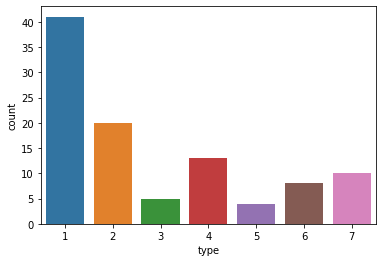

In [10]:
# Coountplot of dependent feature
sns.countplot(dataset.type)

Majority of animals belong to Type 1 class and then to Type 2 class

In [11]:
# Descriptive statistics of the dataset

dataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


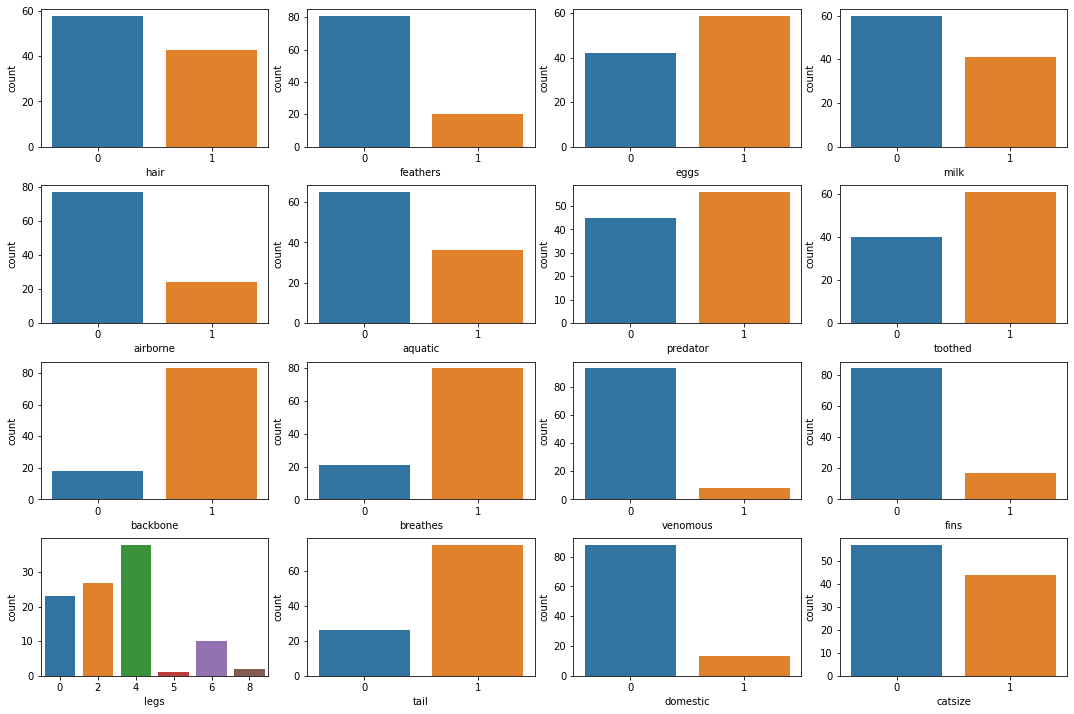

In [17]:
# Countplotplot for numerical data

figure,axes = plt.subplots(4,4,figsize=(15,10))
index = 0
axes = axes.flatten()
x = dataset.iloc[:,:-1]

for i in x.columns:
    sns.countplot( x = dataset[i],ax=axes[index])
    index +=1
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=1)

In [18]:
# Splitting into independent and dependent features

x = dataset.iloc[:,:-1]
y = dataset.type

In [19]:
# Normalizing the dataset

norm = MinMaxScaler()
x = norm.fit_transform(x)

In [20]:
# Splitting into train test dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=5,stratify=y)

In [22]:
# Checking proportion of each type in the dataset

dataset.type.value_counts()/dataset.shape[0]*100

1    40.594059
2    19.801980
4    12.871287
7     9.900990
6     7.920792
3     4.950495
5     3.960396
Name: type, dtype: float64

In [23]:
# Verifying proportion of each type in the train dataset is equivalent to that of dataset

y_train.value_counts()/y_train.shape[0]*100 

1    41.25
2    20.00
4    12.50
7    10.00
6     7.50
3     5.00
5     3.75
Name: type, dtype: float64

In [24]:
# Verifying proportion of each type in the test dataset is equivalent to that of dataset

y_test.value_counts()/y_test.shape[0]*100

1    38.095238
2    19.047619
4    14.285714
7     9.523810
6     9.523810
3     4.761905
5     4.761905
Name: type, dtype: float64

In [25]:
# Knn clasifier 

knn = KNeighborsClassifier(n_neighbors=9)  # Using 9 neighbors
knn.fit(x_train,y_train) # fitting model to train data

# Predicting results for test data
yhat_test = knn.predict(x_test)

In [26]:
# Predicted Type for test data
yhat_test

array([2, 4, 1, 7, 4, 1, 1, 2, 2, 6, 4, 7, 1, 2, 1, 1, 6, 1, 6, 1, 4],
      dtype=int64)

In [27]:
# Accuracy of the model for test data
test_acc = accuracy_score(y_test, yhat_test)
print('Test data Accuracy : {:0.02f} %'.format(test_acc*100))

Test data Accuracy : 85.71 %


In [28]:
# Predicting results for train data to check for overfit or underfit
yhat_train = knn.predict(x_train)

train_acc = accuracy_score(y_train, yhat_train)   # Accuracy of the model for train data
print('Train data Accuracy : {:0.02f} %'.format(train_acc*100))

Train data Accuracy : 91.25 %


    The test and train data have different accuracies
    n_neighbors is the hyper parameter for the model.
    Finding the optimum value for n_neigbour which gives close test and train data accuracy

In [29]:
# finding the optimum n_neighbor value 

accuracy = []
for neigh in range(1, 50, 2):
    KNN = KNeighborsClassifier(n_neighbors = neigh)
    KNN.fit(x_train, y_train)
    train_acc = accuracy_score(KNN.predict(x_train), y_train)
    test_acc = accuracy_score(KNN.predict(x_test), y_test)
    accuracy.append([train_acc, test_acc])

In [30]:
accuracy[0:10]

[[1.0, 1.0],
 [0.9375, 0.9523809523809523],
 [0.95, 0.9523809523809523],
 [0.925, 0.9523809523809523],
 [0.9125, 0.8571428571428571],
 [0.9125, 0.8571428571428571],
 [0.925, 0.8571428571428571],
 [0.875, 0.8571428571428571],
 [0.875, 0.8571428571428571],
 [0.8375, 0.8095238095238095]]

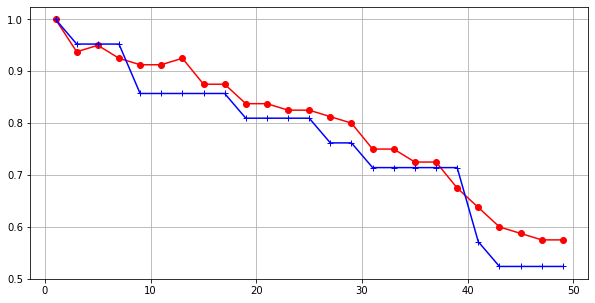

In [31]:
plt.figure(figsize=(10,5))
# Train data accuracy plot 
plt.plot(np.arange(1,50,2),[acc[0] for acc in accuracy],"ro-")

# Test data accuracy plot
plt.plot(np.arange(1,50,2),[acc[1] for acc in accuracy],"b+-")

plt.grid('on')

From the above plot the optimum number of neighbors value for the model is 5, for which we get the maximum accuracy for both train and test data

In [32]:
# Substituing n_neighbors = 5

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train, y_train)

final_yhat_train = KNN.predict(x_train)
final_yhat_test = KNN.predict(x_test)

final_train_acc = accuracy_score(final_yhat_train, y_train)
final_test_acc = accuracy_score(final_yhat_test, y_test)


In [33]:
print('Train data Accuracy : {:0.02f} %'.format(final_train_acc*100)),
print('Test data Accuracy : {:0.02f} %'.format(final_test_acc*100))

Train data Accuracy : 95.00 %
Test data Accuracy : 95.24 %


In [34]:
# Confusion matrix for test data

confusion_matrix(final_yhat_test,y_test)

array([[8, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 2, 1],
       [0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [35]:
# Classification report giving precision and recall for each class in test data

from sklearn.metrics import classification_report

print(classification_report(final_yhat_test,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       0.50      1.00      0.67         1

    accuracy                           0.95        21
   macro avg       0.93      0.95      0.92        21
weighted avg       0.98      0.95      0.96        21



The given model can be used to predict the type of animal based on the given features with an accuracy of 95%